# Exploratory Data Analysis (Retail)


*   Finding out the weak areas where people can work to make more profit.
*   Finding business problems that can be derived by exploring the data.
*   [Dataset](https://bit.ly/3i4rbWl)

***Author: Andrijana Zivic***


# Importing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [2]:
df= pd.read_csv('SampleSuperstore.csv')
df.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


# Understanding & cleaning the data

In [43]:
df.shape #number of rows and columns

(9977, 12)

In [44]:
df.isnull().sum() #checking if there is any null values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In each of the thirteen columns we can see there is no any NULL values.

In [45]:
df.info() #to check the type of columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Region        9977 non-null   object 
 6   Category      9977 non-null   object 
 7   Sub-Category  9977 non-null   object 
 8   Sales         9977 non-null   float64
 9   Quantity      9977 non-null   int64  
 10  Discount      9977 non-null   float64
 11  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.3+ MB


The duplicates of data should be droped, if there is any, because that kind of data can adversely influence EDA.

In [3]:
df.duplicated().sum() #the number of duplicated data

17

In [4]:
df=df.drop_duplicates()
df.shape

(9977, 13)

In [48]:
df.nunique() #to show the numbers of the unique values

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Column "Postal Code" provides not so useful information so it can be erased without major research losses.

In [5]:
df=df.drop(columns='Postal Code')

In [7]:
df.shape

(9977, 12)

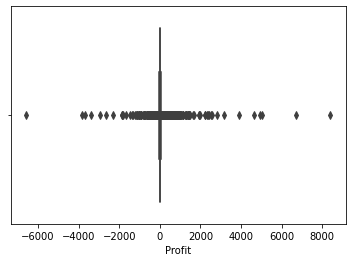

In [6]:
#checking for outliers in profit
sns.boxplot(x=df['Profit'])

In [8]:
sorted(df)

#calculation of IQR
Q1=df['Profit'].quantile(0.25)
Q3=df['Profit'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

27.6458


Boxplot shows that the largest number of samples from the 'Profit' column is in the interval [-2000, 2000]. The IQR is 27.6458, so droping the "outliers" will affect analysis too much. However, there is a couple of real ouliers (values under -6000 and higher of 6000) that can bee seen in the boxplot, but they cannot make a big influence for the analysis, so they will not be deleted.

# Relationship analysis



So far it has been shown that some columns have strong relationship with another, and some not very. Let’s explore that a little more.

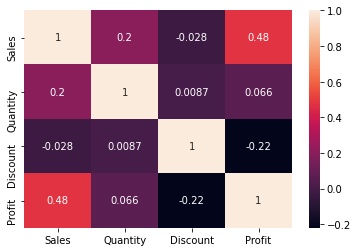

In [9]:
#checking correlation between the numerical data
cor=df.corr()
a=sns.heatmap(cor, annot=True, cbar=True)

The lighter the color on the map - the higher the correlation coefficient. To check how strong this connections are, it is desirable to examine the covariance. Depending on this data, further analysis will be conducted. 

In [61]:
df.cov()

,Sales,Quantity,Discount,Profit
Sales,389028.396022,278.765576,-3.645637,70057.067126
Quantity,278.765576,4.958001,0.003990,34.565743
Discount,-3.645637,0.003990,0.042624,-10.632751
Profit,70057.067126,34.565743,-10.632751,54970.478824


There is a weak connection between discounts and profits, as well as discounts and sales (no discount and sale are given at the same time).

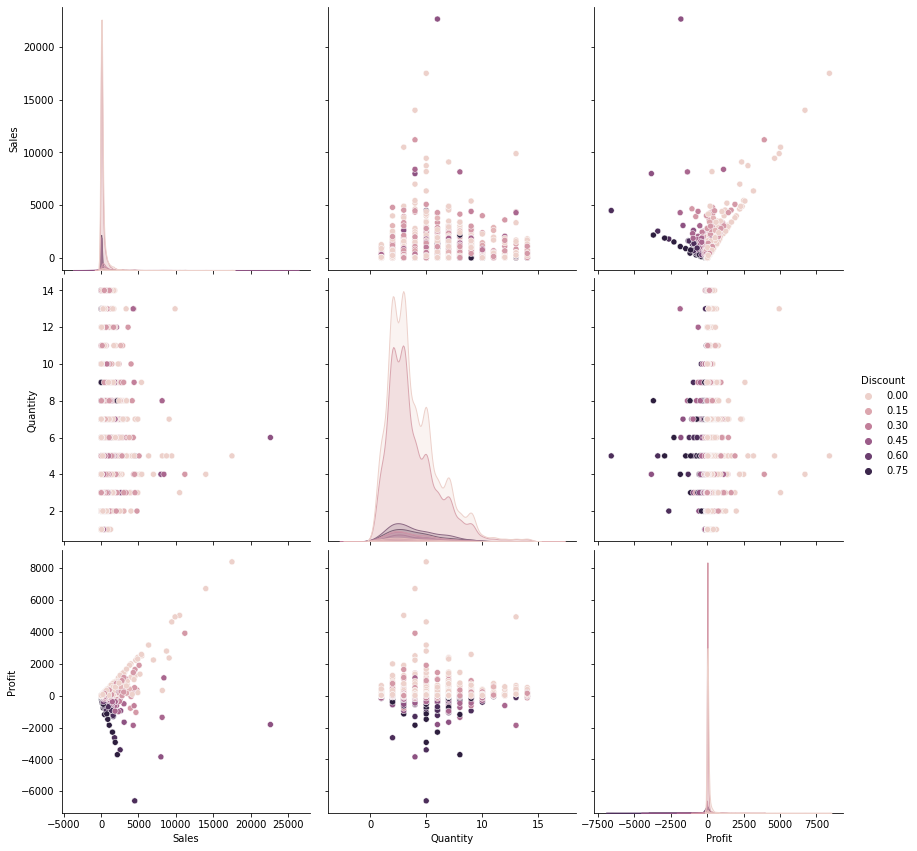

In [10]:
#Visualy
sns.pairplot(df, hue="Discount", height=4)

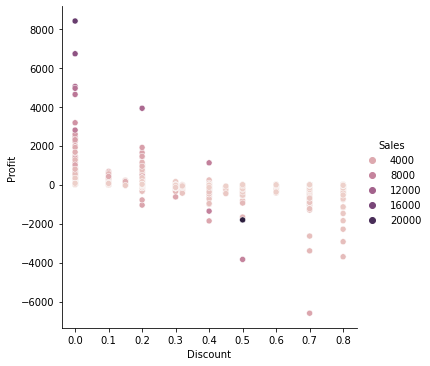

In [11]:
sns.relplot(x='Discount', y='Profit', hue= 'Sales', data=df)

As the discount increases, so does the loss of profit (although a discount is provided for a small amount of product). The best option is not to provide any discount (or up to 20%).
The sale does not affect the profit if a discount is provided. 

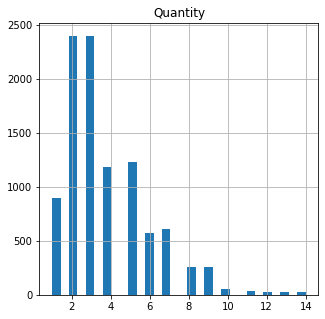

In [12]:
df.hist(column= 'Quantity',figsize=(5,5),bins=30)
plt.show()

Most customers buy 2 or 3 products.

Let's see how many samples there are among the categorical ones.

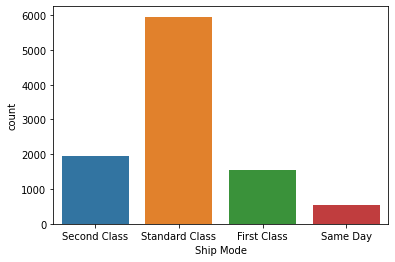

In [19]:
sns.countplot(x=df['Ship Mode'])

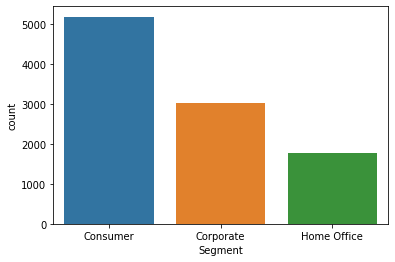

In [20]:
sns.countplot(x=df['Segment'])

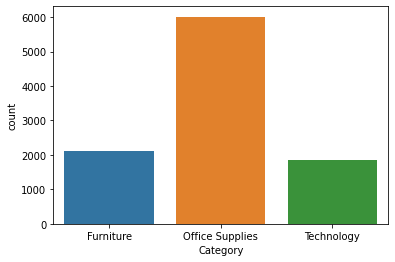

In [21]:
sns.countplot(x=df['Category'])

In the dataset we have big number of sub categories, so using a pie will give a clear picture of the samples .

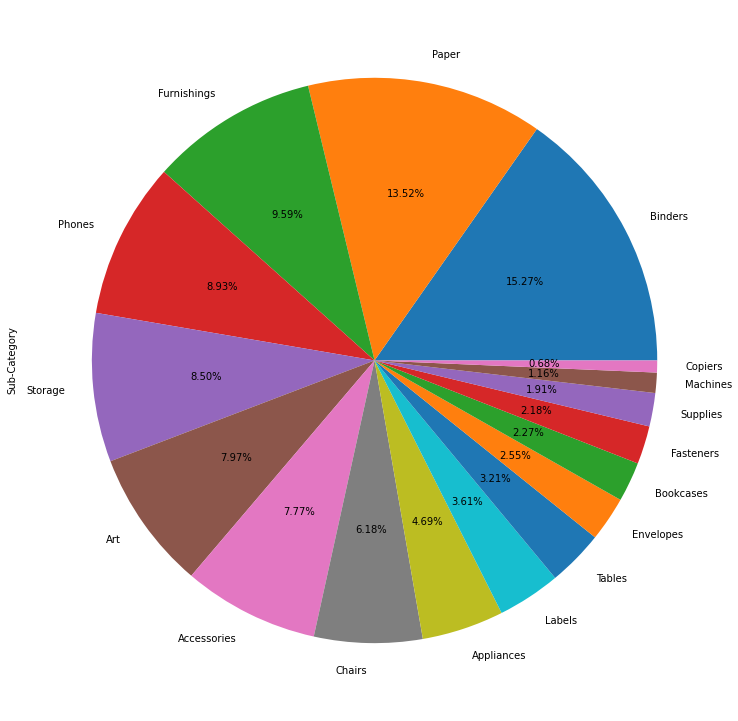

In [51]:
plt.figure(figsize=(18,13))
df['Sub-Category'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

Most sold: Binders, Paper, Furnishings, Phones, Storage.
Minimum sales: Copiers, Machines, Supplies, Fasteners, Bookcases

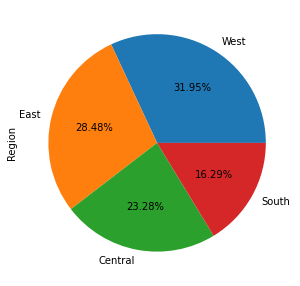

In [53]:
#among the regions
plt.figure(figsize=(5,5))
df['Region'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

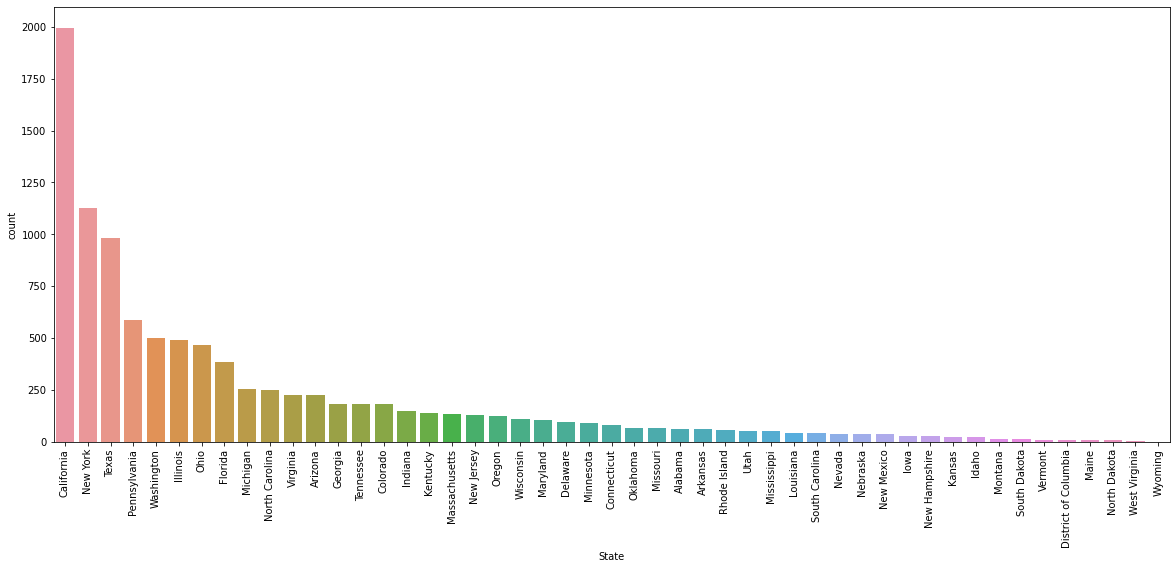

In [15]:
#among the states
plt.figure(figsize=(20,8))
sns.countplot(x='State',data=df,order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

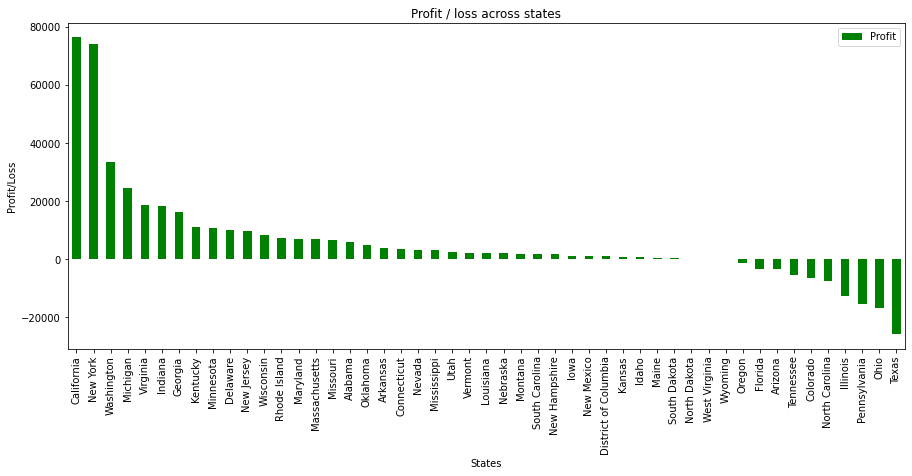

In [31]:
ps = df.groupby('State')[['Profit']].sum().sort_values(by='Profit',ascending=False)
ps[:].plot.bar(color=['green'],figsize=(15,6))
plt.title('Profit / loss across states')
plt.xlabel('States')
plt.ylabel('Profit/Loss')
plt.show()

Greatest purchasing power is in CA, NY, a bit less in Texas and Pennsylvania, but Texas and Pennsilvania (like Ilinois and Ohio) have losses, not profit.

In [60]:
df['City'].value_counts()


New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
                ... 
Redding            1
Palatine           1
Normal             1
Portage            1
Rogers             1
Name: City, Length: 531, dtype: int64

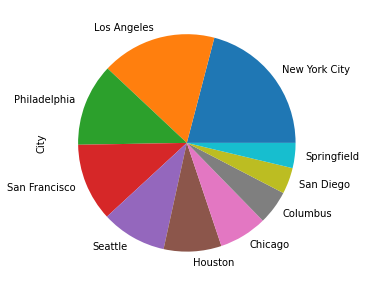

In [88]:
#top 10 cities in the dataset 
tmp= df['City'].value_counts()
tmp1=tmp[:10]
plt.figure(figsize=(10,5))
tmp1.plot.pie()
plt.show()